IMPORTING LIBRARIES

In [1]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf

'''
imports for our
neural networks
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


DOWNLOADING THE DATASET

In [3]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file = tf.keras.utils.get_file(origin=_URL, # Changed URL to _URL
                                   fname="flower_photos.tgz",
                                   extract=True)
base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


types of flowers to classify

In [4]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

EXPLORING OUR DATA

In [5]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

round(len(images)*0.8)

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


639


train and validation directories

In [6]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')


batch_size = 100
IMG_SHAPE =150

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE)
                                               )

Found 2935 images belonging to 5 classes.


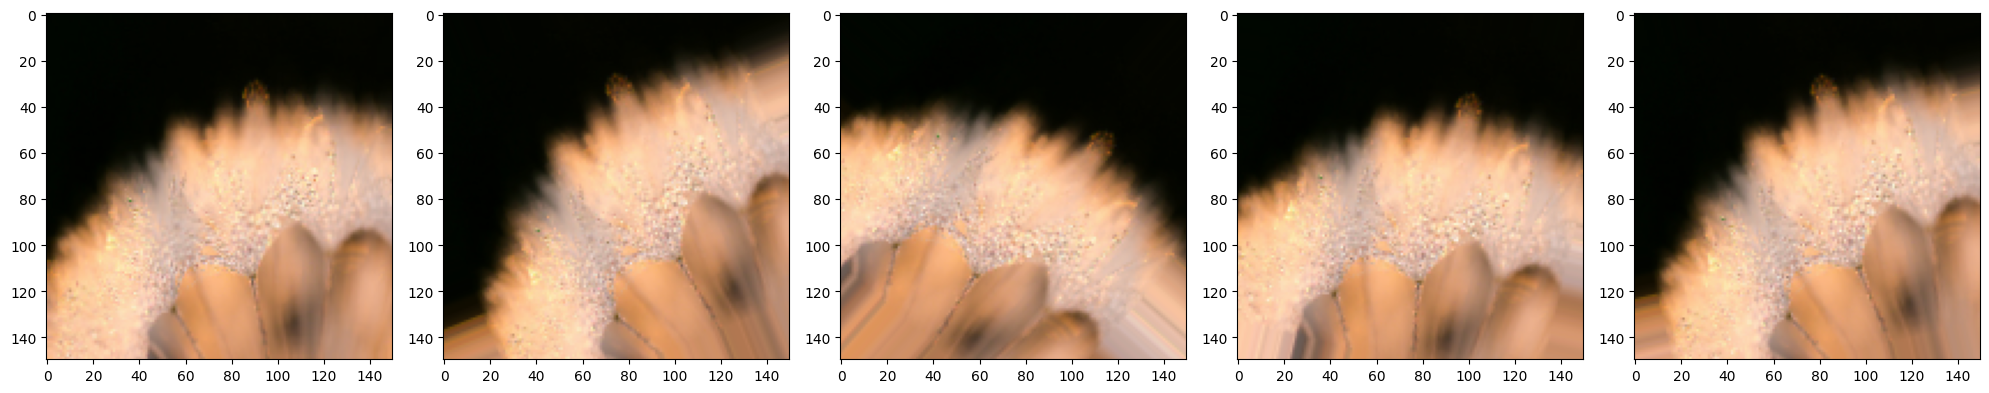

Found 2935 images belonging to 5 classes.


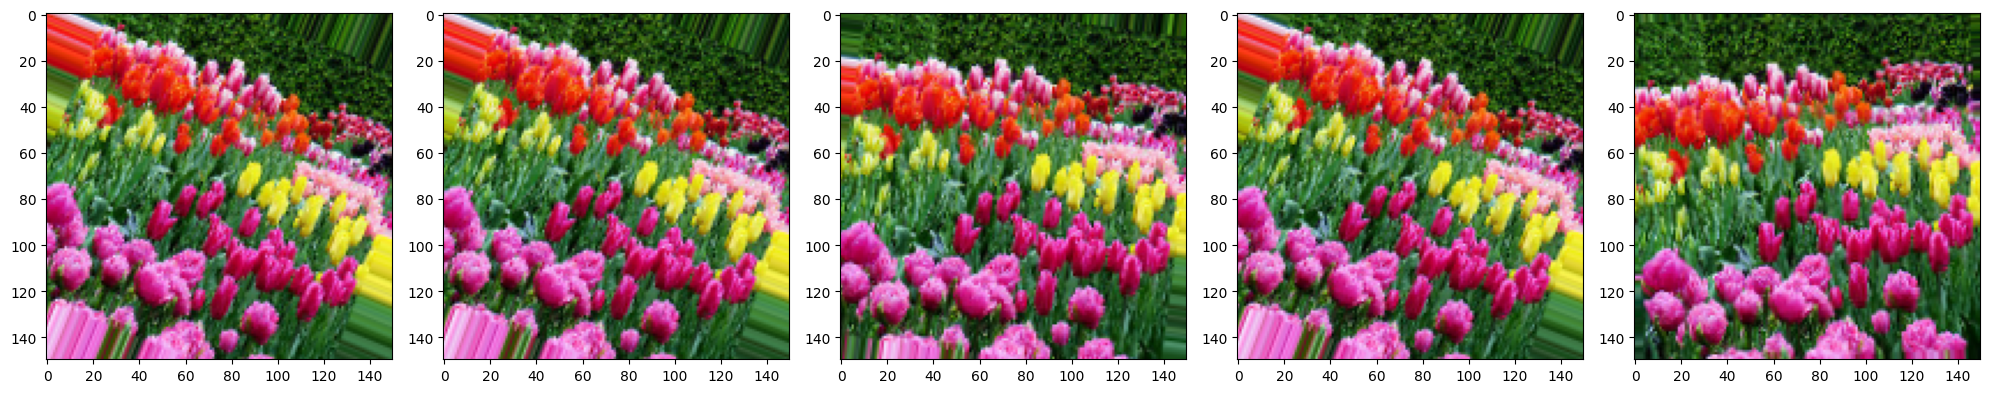

Found 2935 images belonging to 5 classes.


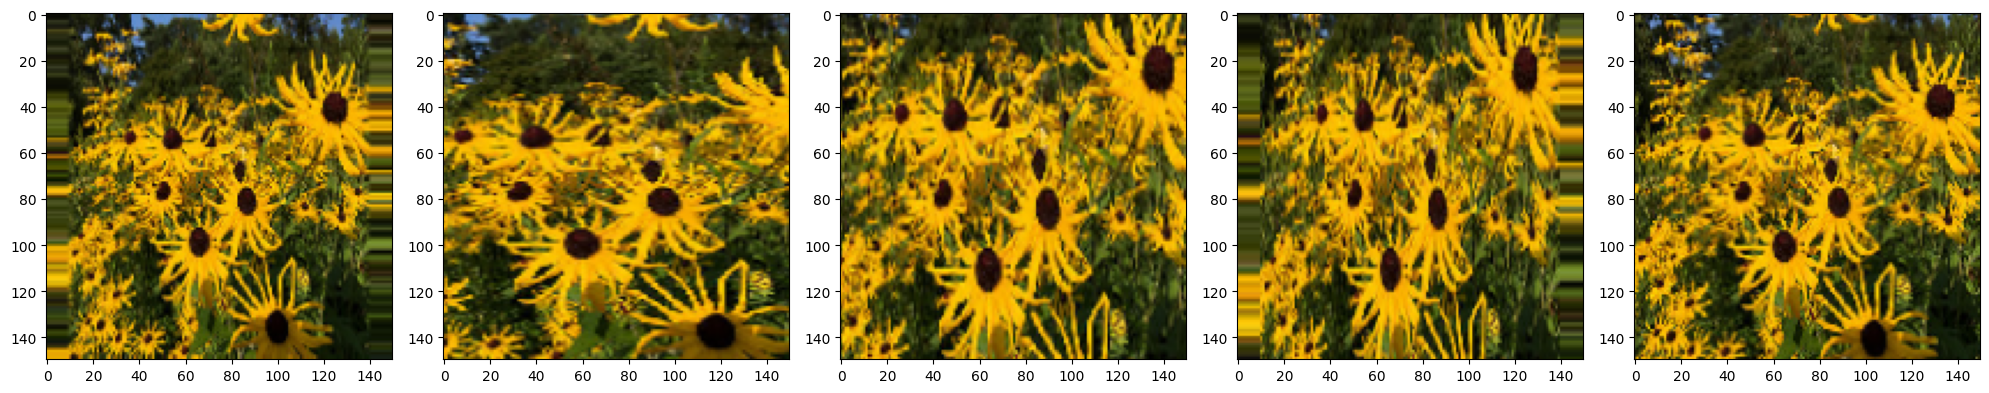

Found 2935 images belonging to 5 classes.


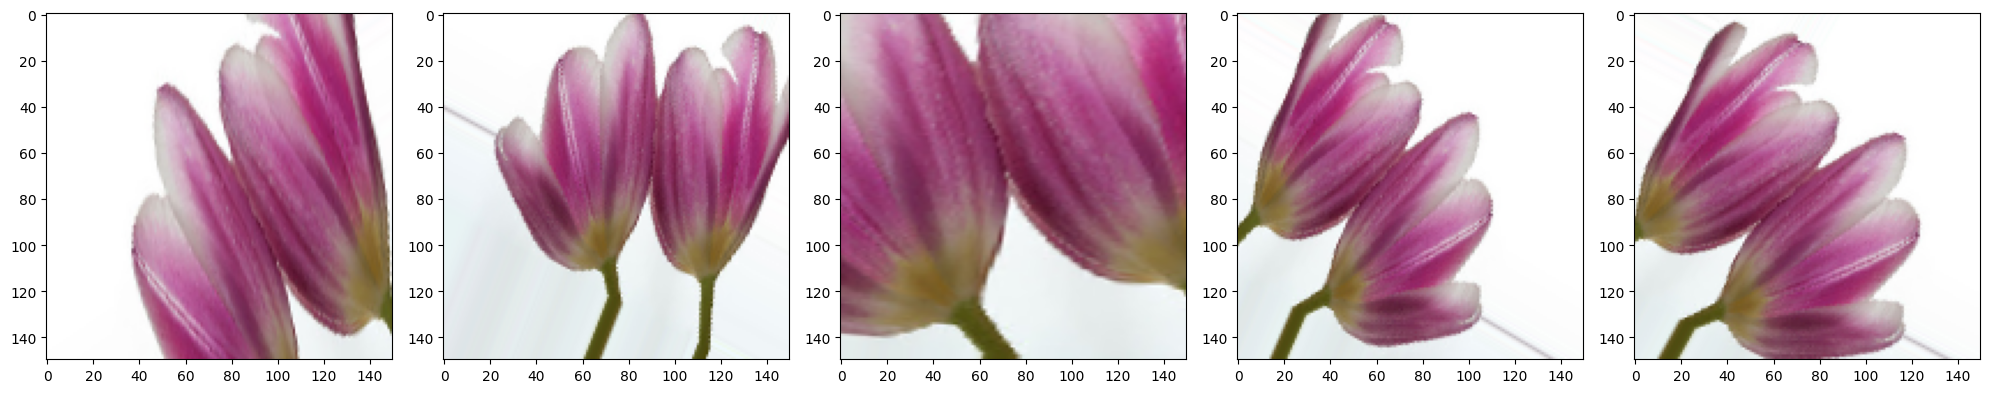

In [8]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE)
                                               )
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE) # Changed 'target' to 'target_size'
                                               )


def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     width_shift_range=.15,
                                     height_shift_range=.15,
                                     horizontal_flip=True,
                                     zoom_range=0.5
                                     )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE, IMG_SHAPE),
                                                     class_mode='sparse'
                                                     )
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

image_gen_val = ImageDataGenerator(rescale=1./255)


VALIDATION DATASET

In [9]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


CREATING THE MODEL

In [10]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


COMPILING THE MODEL

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 10
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.3084 - loss: 1.7142 - val_accuracy: 0.4912 - val_loss: 1.2045
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.4975 - loss: 1.1591 - val_accuracy: 0.5197 - val_loss: 1.1845
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.5656 - loss: 1.0678 - val_accuracy: 0.5796 - val_loss: 1.0466
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.6177 - loss: 0.9863 - val_accuracy: 0.6245 - val_loss: 0.9686
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step - accuracy: 0.6241 - loss: 0.9404 - val_accuracy: 0.6476 - val_loss: 0.9227
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


plot training and validation graphs

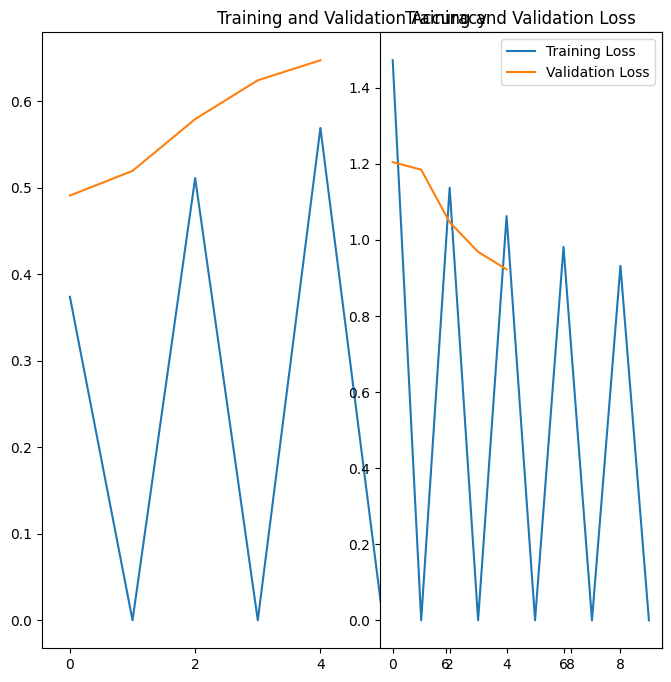

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
# The following line was removed as it was causing an error due to incorrect usage of the plot function
#plt.plot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# The x-axis data for validation accuracy is modified to match the length of val_acc
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# The x-axis data for validation loss is modified to match the length of val_loss
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()